# Module 1 Final Project Submission

**Student name:** Tiara Hlaing<br>
**Student pace:** Full time<br>
**Scheduled project review date/time:** 2/9/19 1pm CST | 2pm EST<br>
**Instructor name:** Joe San Pietro<br>
**Blog post URL:** [thetiaramisu.wordpress.com](https://thetiaramisu.wordpress.com/)

## Background

The obective of this project is to use machine learning on a data set to make predictions based on previous trends, so that I can best advise stakeholders on considerations in their business.

In this particular project, I will analyze a data set of housing sales from a given time period for King County in Washington. With my findings, I will advise my clients on the factors that are most influential in determining a house's market price.

### Understanding the Variables from the Data Set

The column names in the data set are as follows:

* **id** - Unique identifier for the house
* **date** - Date the house was sold
* **price** -  Price is prediction target
* **bedrooms** -  Number of Bedrooms in the house
* **bathrooms** -  Number of bathrooms the house
* **sqft_living** -  Square footage of the house
* **sqft_lot** - Square footage of the lot
* **floors** - Total number of floors (levels) in house
* **waterfront** - Signifies a house with a waterfront
* **view** - Has been viewed
* **condition** - How good the condition of the house is (overall)
* **grade** - Overall grade given to the housing unit, based on King County's grading system
* **sqft_above** - Square footage of the house, apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year the house was built
* **yr_renovated** - Year the house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

***

**Note:** Condition and grade seem to be assessed on a scale. The [King County Residential Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) includes a breakdown for these scales.

#### Defining Condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

#### Defining Grade
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

## The OSEMN Framework

The OSEMN Framework is the data science process that will be used in this project. The process consists of the following steps.

1. **Obtain**: Understanding the details of the assignment, the objective in addressing the questions at hand, and obtaining the relevant data.
2. **Scrub**: Filtering through the collected data to get it to a useful and workable condition. This may include removing irrelevant or cumbersome data, and addressing the issues of messy values in the data set.
3. **Explore**: Taking steps to gain an understanding of the data set, such as creating visualizations to further explore the distributions and relationships amongst variables.
4. **Model**: Building and tuning models using machine learning algorithms to develop a final model that can make future predictions with confidence.
5. **iNterpret**: Drawing conclusions from the data, evaluating the meaning and implications of the findings, and communicating the results.

## Obtaining the Data

### Loading Libraries
* Pandas: working with data frames
* NumPy: processing arrays using scientific computing
* MatPlotLib: data visualization, creates 2-dimensional graphs
* Seaborn: data visualization, more complex graphs
* SciPy: more advanced scientific computing
* StatsModels: statistical data analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import kurtosis, skew

import statsmodels.api as sm
from statsmodels.api import formula
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

### Loading the King County house data csv file

This is the data set we will be analyzing and working with to determine our price prediction model.

In [204]:
kc = pd.read_csv('kc_house_data.csv')

### Initial Previews

In [205]:
kc.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [206]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [207]:
kc.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


#### Observations and Thoughts from the Summary Functions:

#### From .head() :
* From the preview, you can already see that there are null values, at least in the waterfront, view, and yr_renovated columns.
* Several of the columns have a signficant number of values that are 0, meaning that some of those features are not applicable to a good number of the houses.
* The id column is irrelevant to this project in comparing factors to the target, so I will drop this column.

#### From .info() :
* There are 21,597 total entries in this DataFrame.
* There are 21 total columns. "price" is the target variable, and "id" is an identifier. So that means 19 columns represent the features to explore.
* "date" needs to be converted to a datetime object, which is readable by the computer.
* Some of the types don't seem to match up to what I would expect those variables' types to be, especially when looking at the data in the preview. For example, I believe that grade, condition, and zipcode should be categorical variables, not numerical. sqft_basement should not be an object type, so there must be some irregular data in that column. I will double check these later with plots, to see if there are other variables with current data types that should be adjusted.
* It's also interesting that amongst all the sqft columns, sqft_basement is the only one whose numeric values are shown as floats and not integers.

## Scrubbing the Data

### Fixing the Data Types

Again, this is what we want the datatypes to be:
* Columns we can drop: id
* Datetime: date
* Categorical: condition, grade, zipcode 
* Numeric: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

In [208]:
kc.drop('id',axis=1,inplace=True)

In [209]:
kc.date = pd.to_datetime(kc.date)

In [210]:
conv_to_cat = ['waterfront','condition','grade','zipcode']

for i in conv_to_cat:
    kc[i] = kc[i].astype('str')

In [211]:
kc.sqft_basement = kc.sqft_basement.astype(float)

ValueError: could not convert string to float: '?'

Something is up with the values in the sqft_basement category that will not let us change the entire column to a numeric type.

In [212]:
kc.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [213]:
kc.sqft_basement.value_counts().head(5)

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [214]:
print(f'Percentage of "?" in the data: {str(round(100*454/len(kc),2))}%')

Percentage of "?" in the data: 2.1%


We can see from the list of the unique values and value counts that there were 454 values of "?" in this column, making up 2% of the data here. That's obviously a filler value that needed to be adjusted. As the most common value for the basement square footage was 0.0 by far (indicating no basement), it feels safe to convert the "?" values to 0.0 and assume they don't have a basement.

In [215]:
kc.sqft_basement.replace('?','0.0', inplace=True)

kc.sqft_basement.value_counts().head(5)

0.0      13280
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

Now we should be able to convert the datatype.

In [216]:
kc.sqft_basement = kc.sqft_basement.astype(float)
kc.sqft_basement = kc.sqft_basement.astype(int)

In [217]:
kc.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                    float64
condition                object
grade                    object
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [218]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,nan,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Dealing with Null Values

In [219]:
kc.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

View and year renovated clearly have null values. But also from the the preview of the data set, we can see that waterfront also has null values that weren't detected. I will just drop that column.

In [220]:
kc.drop('waterfront',axis=1,inplace=True)

In [221]:
print(f'Unique values in View Column: {str(kc.view.unique())}')
print(f'Percentage Null in View Column: {str(round(100*len(kc[kc.view.isna()])/len(kc),2))}%\n')

print(f'Number of unique values in Year Renovated Column: {str(kc.yr_renovated.nunique())}')
print(f'Percentage Null in Year Renovated Column: {str(round(100*len(kc[kc.yr_renovated.isna()])/len(kc),2))}%')

Unique values in View Column: [ 0. nan  3.  4.  2.  1.]
Percentage Null in View Column: 0.29%

Number of unique values in Year Renovated Column: 70
Percentage Null in Year Renovated Column: 17.79%


In [222]:
kc.yr_renovated.value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [223]:
print(f'Percentage of 0.0 values in yr_renovated: {round(100*(sum(kc.yr_renovated == 0.0) / len(kc.yr_renovated)),2)}%')

Percentage of 0.0 values in yr_renovated: 78.77%


The percentage of rows with null values in the Year Renovated column is quite significant (17.79%). Because 0 is the most common value in by far, making up 78% of the values, those houses were likely not renovated.

I will replace all null values with 0 for this column, as it is safest to assume that a null entry means that this house was not renovated.

In [224]:
kc.yr_renovated.fillna(0.0,inplace=True)

The 63 rows with null values in the view column make up only .29% of the dataset. Because this is such a smaller percentage, I will just discard these rows from the dataset.

In [225]:
kc = kc.dropna()

Double checking for null values.

In [226]:
print('Unique values in View Column: '+str(kc.view.unique()))
print('Percentage Null in View Column: '+str(round(100*len(kc[kc.view.isna()])/len(kc),2))+'%\n')

print('Number of unique values in Year Renovated Column: '+str(kc.yr_renovated.nunique()))
print('Percentage Null in Year Renovated Column: '+str(round(100*len(kc[kc.yr_renovated.isna()])/len(kc),2))+'%')

kc.isna().sum()

Unique values in View Column: [0. 3. 4. 2. 1.]
Percentage Null in View Column: 0.0%

Number of unique values in Year Renovated Column: 70
Percentage Null in Year Renovated Column: 0.0%


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Checking the distributions

Before we get into this, I want to change the yr_built to the age of the house, as I think this will be a better indicator. I will leave yr_renovated, as I think the 0's are significant to compare with houses that were renovated with houses that were not.

In [227]:
kc['age'] = kc.date.dt.year - kc.yr_built
kc.drop(['yr_built'],axis=1, inplace=True)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0,0.0,98178,47.5112,-122.257,1340,5650,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1991.0,98125,47.7210,-122.319,1690,7639,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,0.0,98028,47.7379,-122.233,2720,8062,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,0.0,98136,47.5208,-122.393,1360,5000,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,0.0,98074,47.6168,-122.045,1800,7503,28


In [228]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.233863,1788.557537,285.244311,68.866722,47.560180,-122.213948,1986.299944,12751.079502,43.320284
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.765686,827.745641,439.334095,364.314552,0.138528,0.140735,685.121001,27255.483308,29.378039
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000,0.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,1190.000000,0.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,1560.000000,0.000000,0.000000,47.571900,-122.230000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,2210.000000,550.000000,0.000000,47.678100,-122.125000,2360.000000,10083.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [229]:
kc.age.value_counts().tail()

 113    28
 115    26
 81     23
 80     21
-1      12
Name: age, dtype: int64

Age should not have negative values. There are very few that do, so I will assume there is some error in the information, and I will just drop these rows.

In [230]:
kc = kc[kc.age > 0]

In [231]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,2.109300e+04,21093.000000,21093.000000,21093.000000,2.109300e+04,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000,21093.000000
mean,5.370462e+05,3.365429,2.102807,2068.296544,1.529063e+04,1.480776,0.236951,1774.588015,287.641872,70.306547,47.560279,-122.214154,1980.186413,12896.655763,44.226568
std,3.652459e+05,0.926496,0.766409,913.712827,4.177516e+04,0.534419,0.770378,820.460535,441.180315,367.965934,0.138618,0.140652,680.479807,27504.193862,29.000097
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000,0.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.100000e+03,1.000000,0.000000,1190.000000,0.000000,0.000000,47.470300,-122.328000,1480.000000,5130.000000,19.000000
50%,4.500000e+05,3.000000,2.250000,1900.000000,7.680000e+03,1.000000,0.000000,1550.000000,0.000000,0.000000,47.571900,-122.231000,1840.000000,7670.000000,41.000000
75%,6.400000e+05,4.000000,2.500000,2530.000000,1.079600e+04,2.000000,0.000000,2185.000000,550.000000,0.000000,47.678300,-122.126000,2350.000000,10125.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


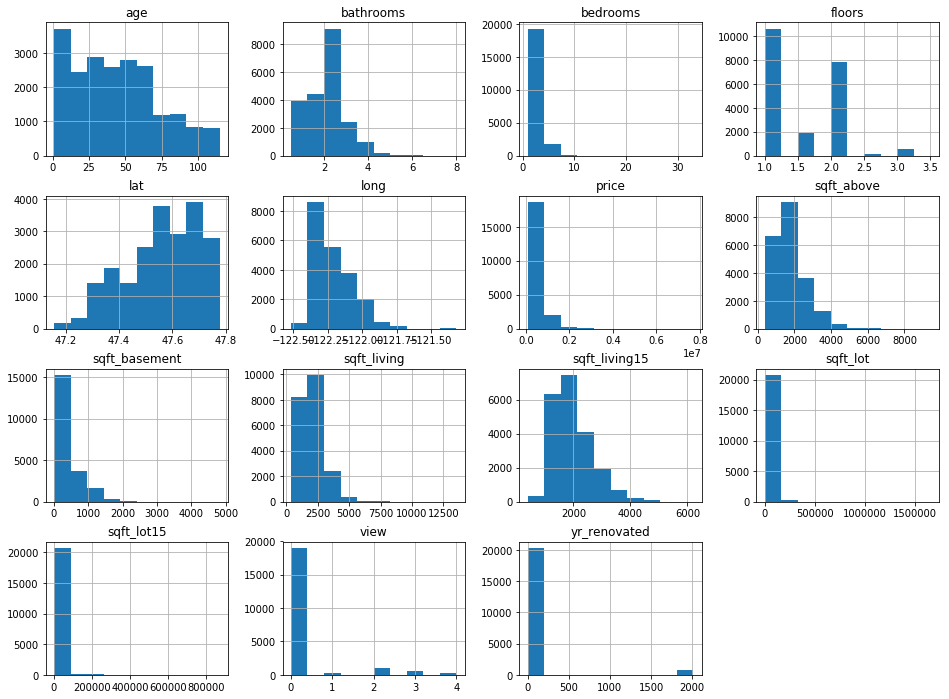

In [232]:
kc.hist(figsize=(16,12));

### Checking for Outliers

Scatter will help us visalize to see if there are outliers that should be discarded, because they may skew our analysis. I will first check the price category, to see if there are any ridiculously highly priced houses that shouldn't be included, as this may help control our analysis of the factors that generally have the most influence.

In [233]:
kc.price.describe().round(2)

count      21093.00
mean      537046.15
std       365245.86
min        78000.00
25%       320000.00
50%       450000.00
75%       640000.00
max      7700000.00
Name: price, dtype: float64

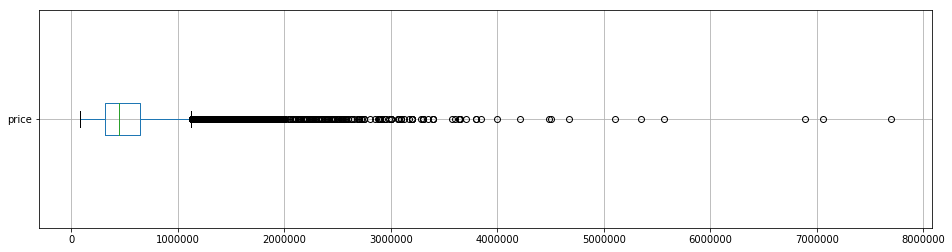

In [234]:
kc.boxplot(column = 'price',vert=False, figsize=(16,4))

In [235]:
kc = kc[kc.price < 3500000] 
# drops rows priced over $3,500,000, as their data probably won't be generalizable

In [236]:
kc.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00,21072.00
mean,533003.72,3.36,2.10,2063.29,15280.23,1.48,0.23,1770.83,286.38,70.00,47.56,-122.21,1978.38,12888.48,44.24
std,340037.88,0.93,0.76,898.03,41793.36,0.53,0.77,810.73,437.86,367.18,0.14,0.14,678.14,27515.21,29.00
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,370.00,0.00,0.00,47.16,-122.52,399.00,651.00,1.00
25%,320000.00,3.00,1.50,1420.00,5100.00,1.00,0.00,1190.00,0.00,0.00,47.47,-122.33,1480.00,5126.50,19.00
50%,450000.00,3.00,2.25,1900.00,7670.00,1.00,0.00,1550.00,0.00,0.00,47.57,-122.23,1830.00,7666.00,41.00
75%,639125.00,4.00,2.50,2520.00,10766.00,2.00,0.00,2180.00,550.00,0.00,47.68,-122.13,2350.00,10125.00,63.00
max,3400000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,9410.00,4130.00,2015.00,47.78,-121.32,6210.00,871200.00,115.00


In [237]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(len(num_feats))
num_feats

14


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'age']

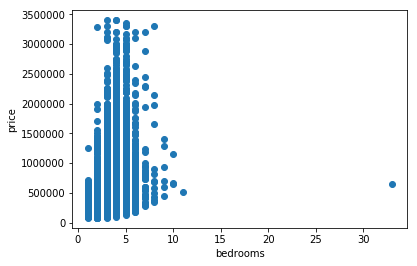

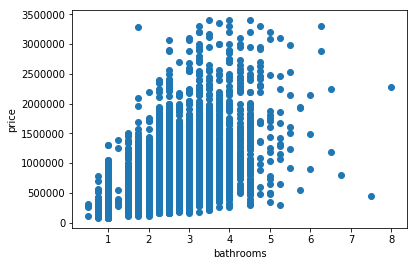

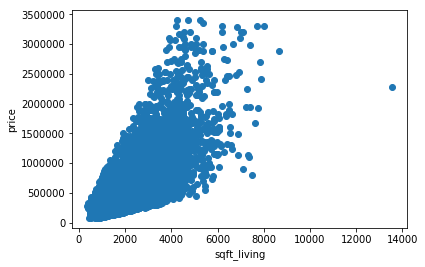

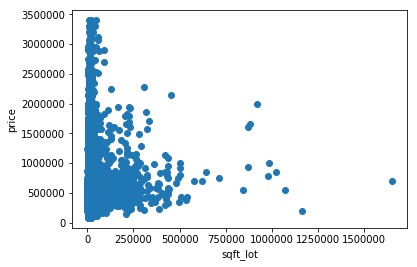

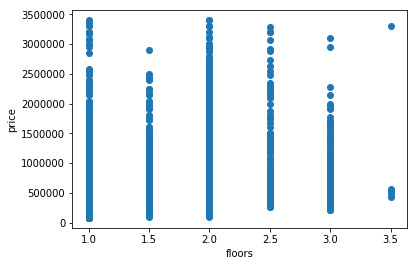

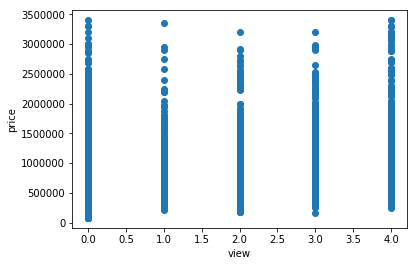

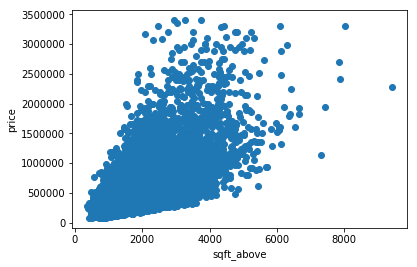

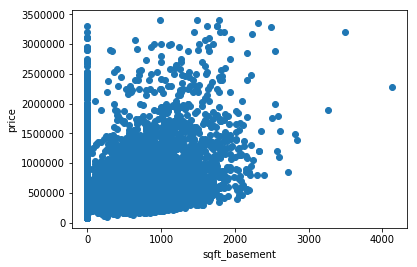

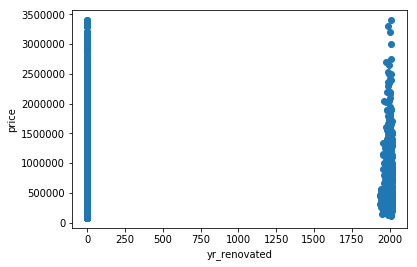

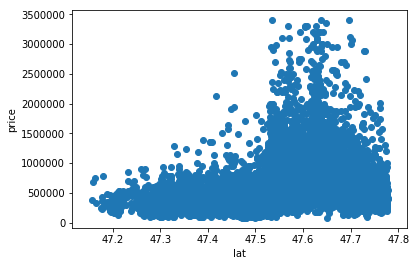

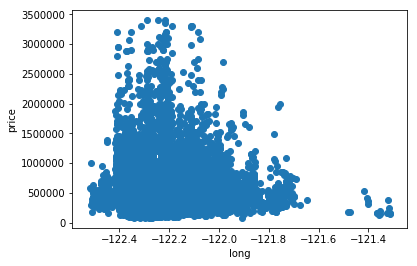

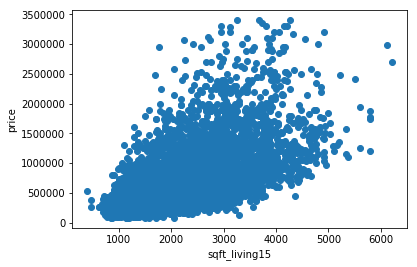

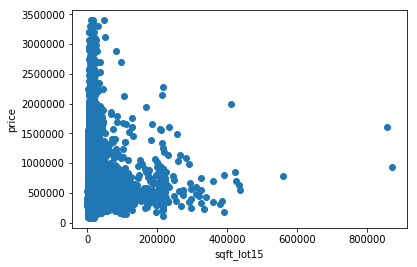

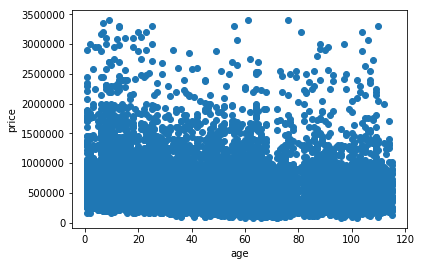

In [238]:
for i in num_feats:
    plt.scatter(kc[i],kc.price)
    plt.xlabel(str(i))
    plt.ylabel('price')
    plt.show()

From the scatterplots, it looks like sqft_living and sqft_living15 have very similar patterns, as do sqft_lot and sqft_lot15. I suspect that there is multicollinearity in these features, so I will remove the sqft_living15 and sqft_lot15 columns.

In [240]:
kc.drop(['sqft_living15','sqft_lot15'],axis=1,inplace=True)

In [241]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(len(num_feats))
num_feats

12


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_renovated',
 'lat',
 'long',
 'age']

#### Removing the Outliers

From the scatterplots, there are some clear outliers that should be removed, with one major outlier in both bedrooms and sqft_lot, and two in sqft_living. I will remove these. We will see if doing a log transform on the data later will normalize the rest.

In [242]:
kc.drop(kc[kc.bedrooms>11].index, inplace=True)

kc.drop(kc[kc.sqft_living>11000].index, inplace=True)

kc.drop(kc[kc.sqft_lot>1250000].index, inplace=True)

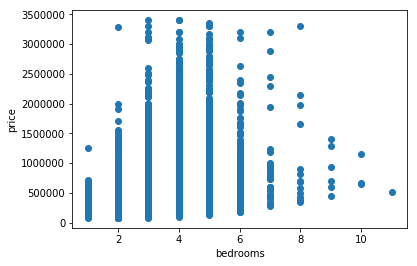

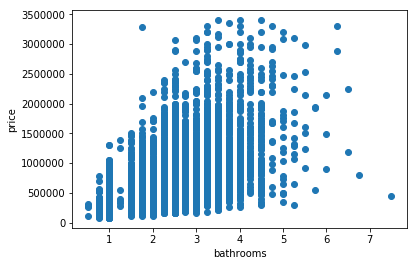

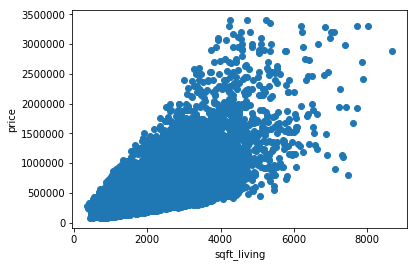

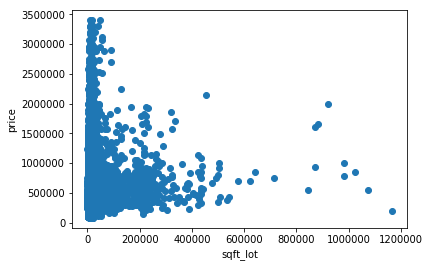

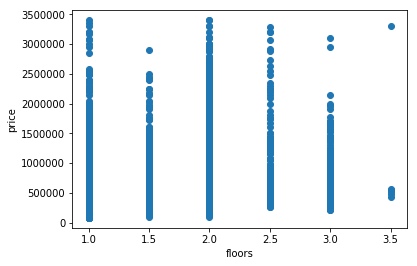

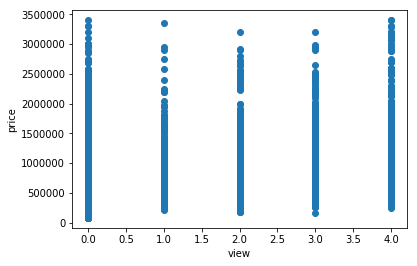

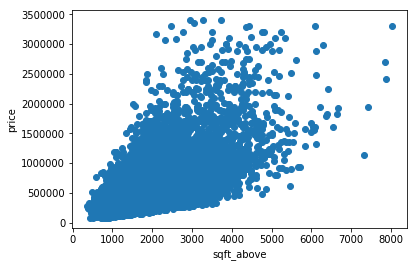

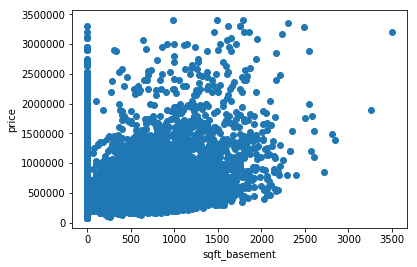

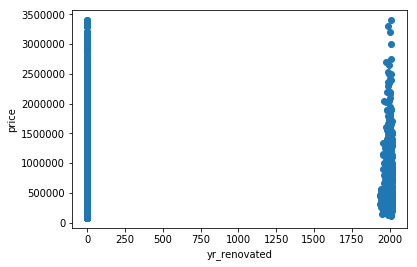

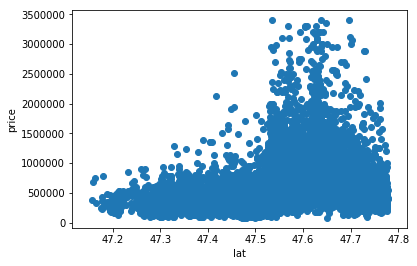

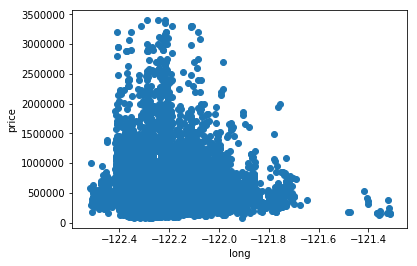

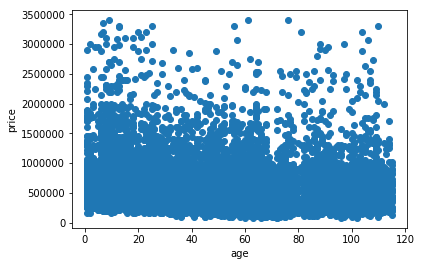

In [243]:
for i in num_feats:
    plt.scatter(kc[i],kc.price)
    plt.xlabel(str(i))
    plt.ylabel('price')
    plt.show()

## Exploring the Data

### KDE

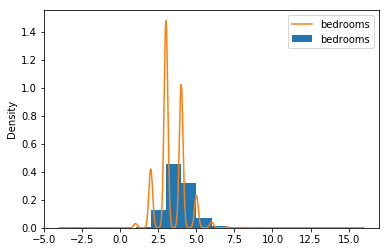

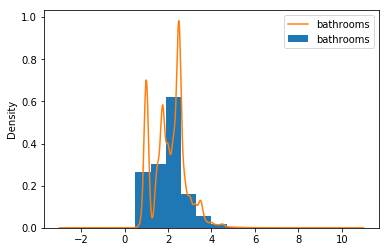

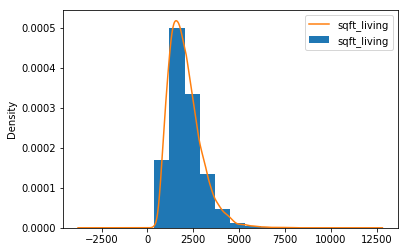

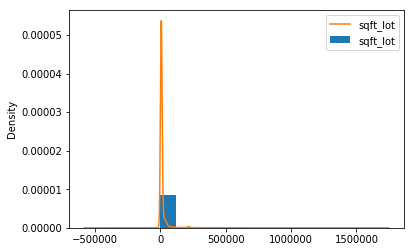

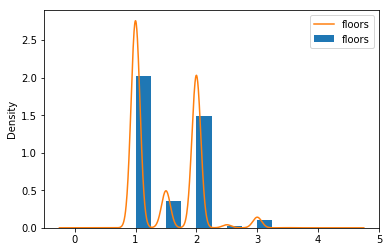

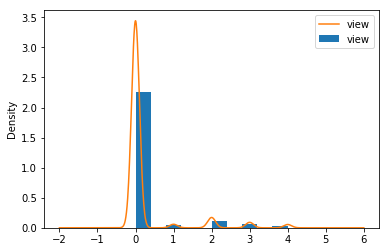

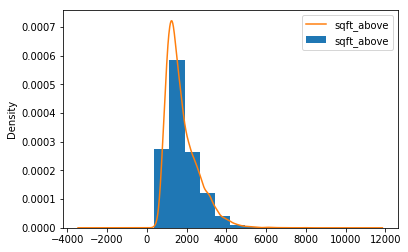

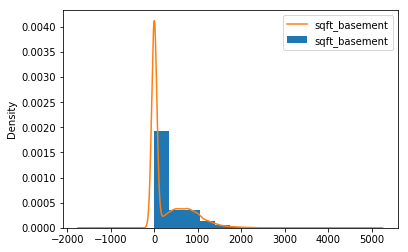

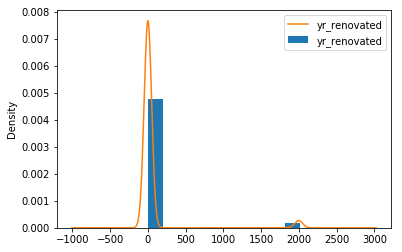

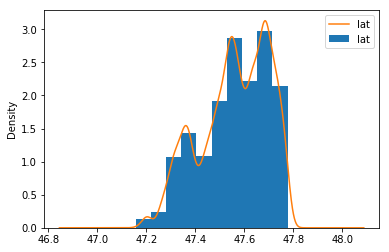

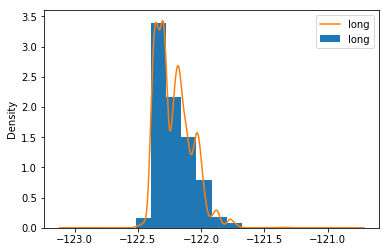

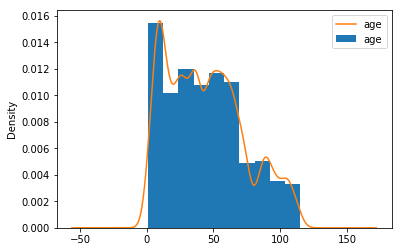

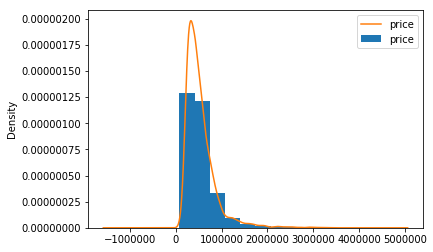

In [244]:
for feat in num_feats:
    kc[feat].plot.hist(density=True)
    kc[feat].plot.kde(label=feat)
    plt.legend()
    plt.show()
kc.price.plot.hist(density=True)
kc.price.plot.kde(label='price')
plt.legend()
plt.show()

In [245]:
for each in list(num_feats):
    print('For '+str(each)+' the skew is '+str(round(skew(kc[each]),3))+' and the kurtosis is '+str(round(kurtosis(kc[each]),3)))
print('For price the skew is '+str(round(skew(kc['price']),3))+' and the kurtosis is '+str(round(kurtosis(kc['price']),3)))

For bedrooms the skew is 0.565 and the kurtosis is 1.875
For bathrooms the skew is 0.443 and the kurtosis is 0.762
For sqft_living the skew is 1.253 and the kurtosis is 2.776
For sqft_lot the skew is 11.389 and the kurtosis is 199.225
For floors the skew is 0.639 and the kurtosis is -0.482
For view the skew is 3.387 and the kurtosis is 10.831
For sqft_above the skew is 1.378 and the kurtosis is 2.691
For sqft_basement the skew is 1.511 and the kurtosis is 1.866
For yr_renovated the skew is 5.055 and the kurtosis is 23.554
For lat the skew is -0.482 and the kurtosis is -0.682
For long the skew is 0.892 and the kurtosis is 1.091
For age the skew is 0.473 and the kurtosis is -0.651
For price the skew is 2.812 and the kurtosis is 12.567


#### Observations and Thoughts from the Histograms and KDEs:
* There is quite a bit of skew in many of these variables. Kurtosis is also unideal. Our goal is to get these closer to a normal distribution, with skew closer to zero and kurtosis closer to 3.
* lat, long, and sqft_living are the closest to a normal distribution. However, lat and long are not necessarily continuous data and are only useful together. I will drop these two, as we can work with zipcode if we would like to deal with location.
* sqft_lot is very positively skewed and has an extremely high kurtosis level piquing at 199. I will go ahead and drop this column.
* Our target variable, price, is also quite positively skewed and has a high kurtosis.

In [246]:
kc.drop(['sqft_lot','lat','long'],axis=1,inplace=True)

In [247]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats)} numeric features are {num_feats}.\n\n All the kept columns are {list(kc.columns)}')

 The 9 numeric features are ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'age'].

 All the kept columns are ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'age']


### Joint Plots

/Users/tiarahlaing/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


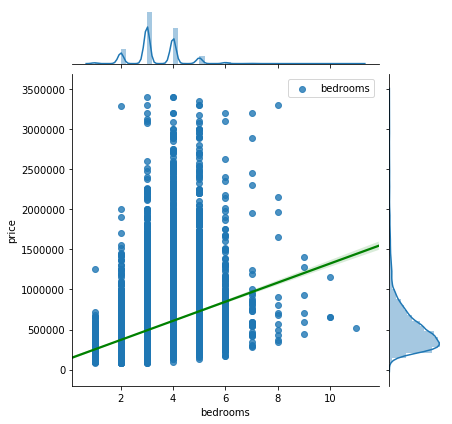

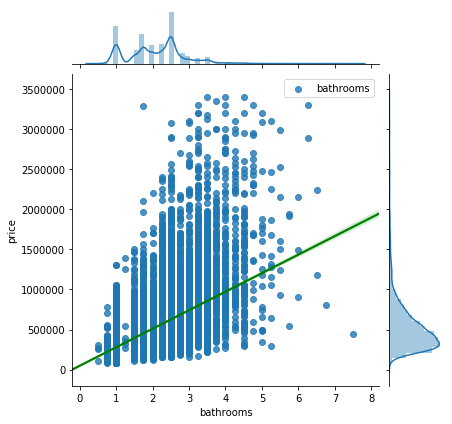

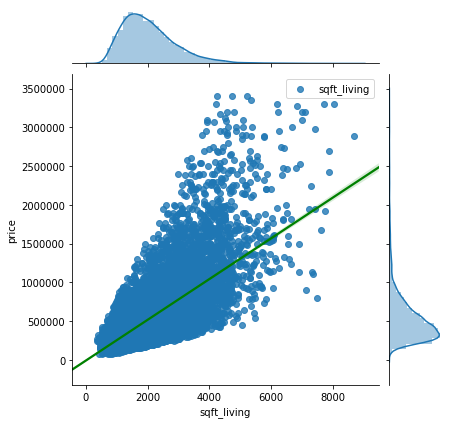

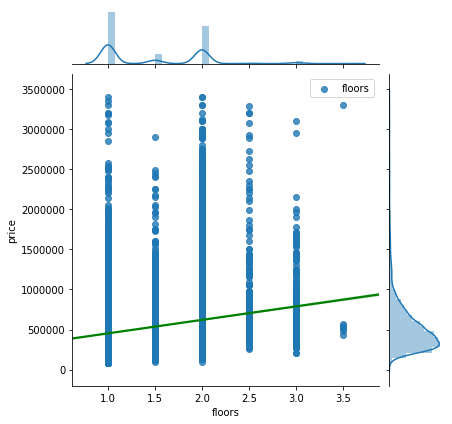

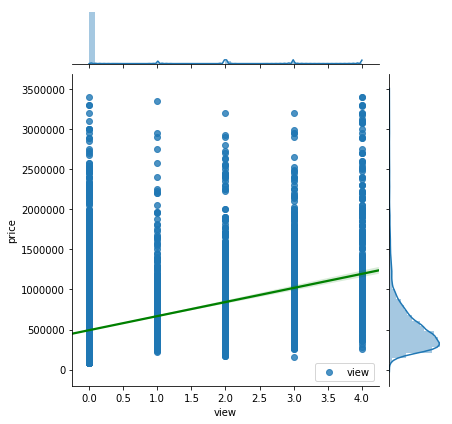

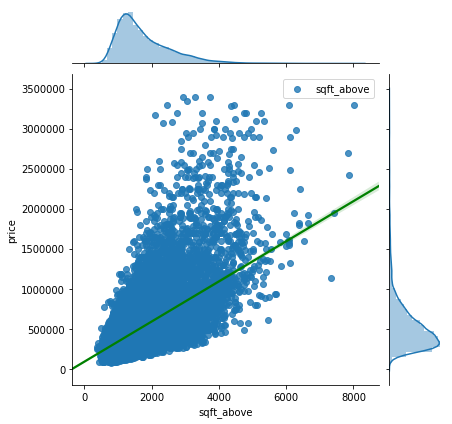

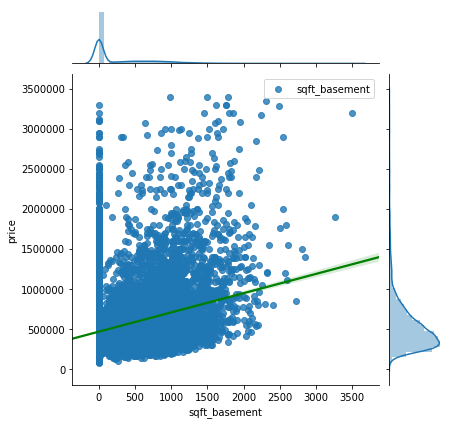

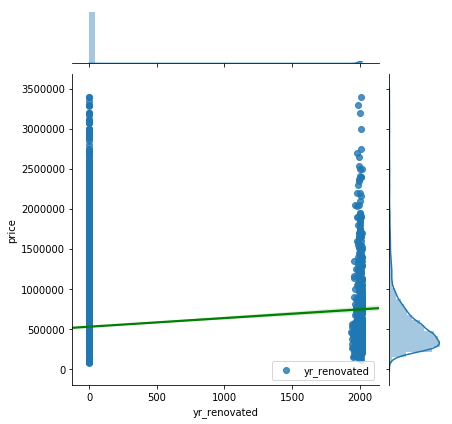

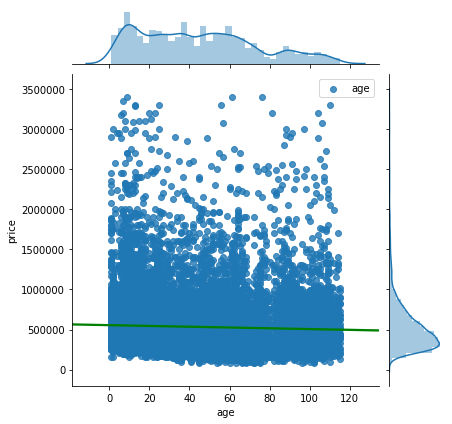

In [248]:
for feat in num_feats:
    sns.jointplot(x=feat, y='price',
                  data=kc,
                  kind='reg',
                  label=feat,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

#### Observations and Thoughts from the Joint Plots:
* All of these features have at least a slight positive relationship with price.
* There is a very significant number of houses that list 0 sqft_basement, suggesting that many of them do not have basements. I will go ahead and discard this feature, as it may not be pertinent to the overall dataset.
* There is a decrease in price as the age of the house goes up, which makes sense.
* There seems to be an increase in price for houses that were renovated vs. houses that were not.
* As observed in previous visualizations, sqft_living continues to display the strongest linear relationship with price.

In [249]:
kc.drop(['sqft_basement'],axis=1,inplace=True)

In [250]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats)} numeric features are {num_feats}.\n\n All the kept columns are {list(kc.columns)}')

 The 8 numeric features are ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'sqft_above', 'yr_renovated', 'age'].

 All the kept columns are ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'yr_renovated', 'zipcode', 'age']


## Checking for Multicollinearity

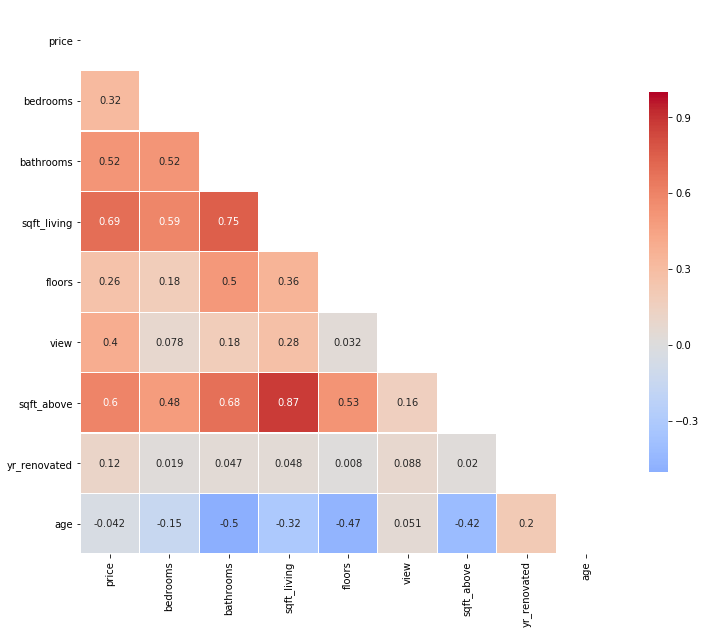

In [251]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 10))

corr = kc.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(round(kc.corr(),3), mask=mask, cbar_kws={'shrink':.7}, annot=True, center=0, linewidth=0.3, cmap='coolwarm');

Seeing as how there is a high correlation of 0.87 between sqft_above and sqft_living, I will remove one of these columns. I will keep sqft_living, as that feature seems to have a higher correlation with price than sqft_above does. sqft_living also has a high correlation of 0.75 with bathrooms. I will drop that column as well.

In [252]:
kc.drop(['sqft_above','bathrooms'],axis=1,inplace=True)

In [253]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats)} numeric features are {num_feats}.\n\n All the kept columns are {list(kc.columns)}')

 The 6 numeric features are ['bedrooms', 'sqft_living', 'floors', 'view', 'yr_renovated', 'age'].

 All the kept columns are ['date', 'price', 'bedrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode', 'age']


## Questions

In order to gain more insight into relationships between particular features and the target variable, I will further explore the data set. The questions I want to examine into are:
* Does the time of year impact the selling value?
* Is condition or grade of house a bigger factor in price?
* Do renovated houses sell for more than houses that were not?

## Does the time of year impact the selling value?

In exploring the patterns in selling patterns throughout different months of the year, I will analyze the trends in number of sales per month, as well as the average price that the homes sell for each month.

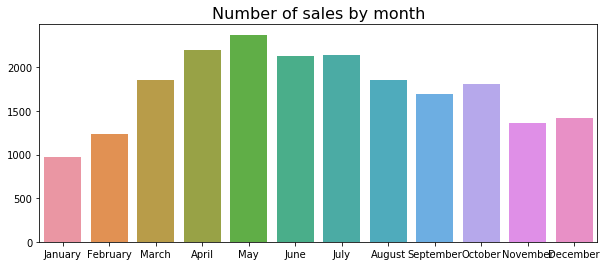

In [254]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = []

for i in range(1,13):
    monthly_sales.append(sum(kc.date.dt.month == i))
    
plt.figure(figsize=(10,4))
sns.barplot(months, monthly_sales)
plt.title('Number of sales by month', fontdict={'fontsize': 16})
plt.show()

In [255]:
just_time = kc[['date','price']]
averages = just_time.groupby(kc.date.dt.month).mean().sort_values('price',ascending=True)
averages.sort_index(axis=0,ascending=True,inplace=True)
averages

,price
date,
1,522830.319588
2,508122.887994
3,543091.916174
4,555508.066727
5,543780.273684
6,549265.618557
7,541156.286381
8,525716.867314
9,519140.239246


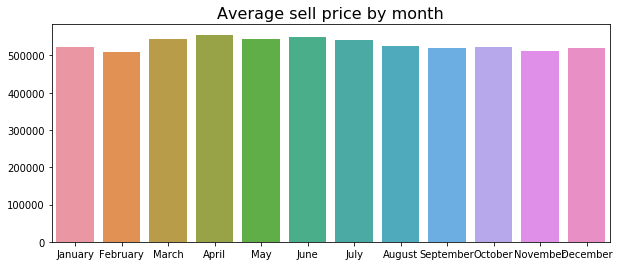

In [256]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_avgs = []

for i in range(1,13):
    monthly_avgs.append(averages.price[i])
    
plt.figure(figsize=(10,4))
sns.barplot(months, monthly_avgs)
plt.title('Average sell price by month', fontdict={'fontsize': 16})
plt.show()

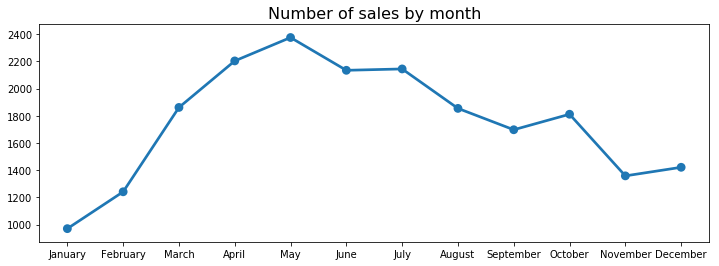

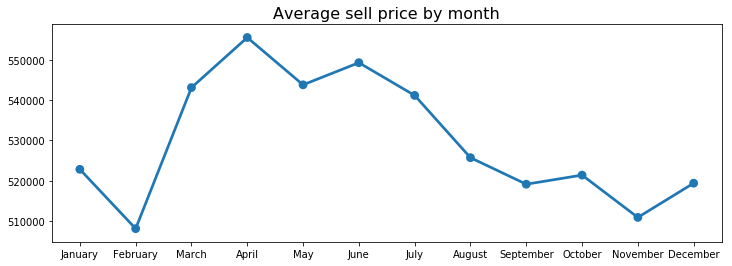

In [257]:
plt.figure(figsize=(12,4))
sns.pointplot(months, monthly_sales)
plt.title('Number of sales by month', fontdict={'fontsize': 16})
plt.show()
    
plt.figure(figsize=(12,4))
sns.pointplot(months, monthly_avgs)
plt.title('Average sell price by month', fontdict={'fontsize': 16})
plt.show()

### Analysis on time of year:
* From this span of time, there seems to be a trend in both the number of homes sold per month, and the average price that homes are sold for each month. These patterns also appear to trend alongside similar timeframes.
* It seems that late spring and early summer is an ideal time to sell your house. It is a more common time for houses to sell, and the average price per house sale is also higher at that time.

## Is condition or grade of house a bigger factor in price?

In [258]:
conditions = kc[['condition','price']]
cond_avg = conditions.groupby(kc.condition).mean()
cond_avg.sort_index(axis=0,ascending=True,inplace=True)
round(cond_avg,3)

,price
condition,
1,341067.241
2,328178.759
3,532888.952
4,516843.958
5,610429.345


In [259]:
grades = kc[['grade','price']]
grades.grade = pd.to_numeric(grades.grade)
grade_avg = grades.groupby(kc.grade).mean().sort_values('grade',ascending=True)
round(grade_avg,3)

/Users/tiarahlaing/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/tiarahlaing/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'grade' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,grade,price
grade,,
3,3,262000.000
4,4,212001.852
5,5,248523.971
6,6,301695.674
7,7,402778.705
8,8,544637.912
9,9,774606.538
10,10,1068354.859
11,11,1449398.852


/Users/tiarahlaing/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


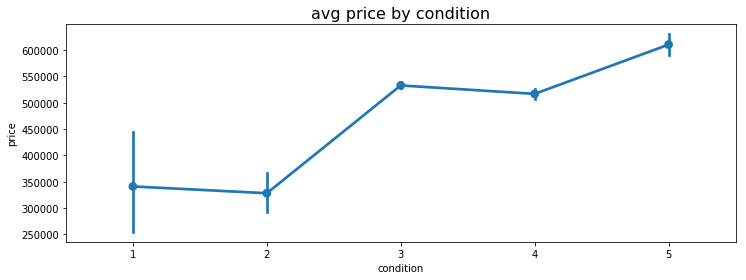

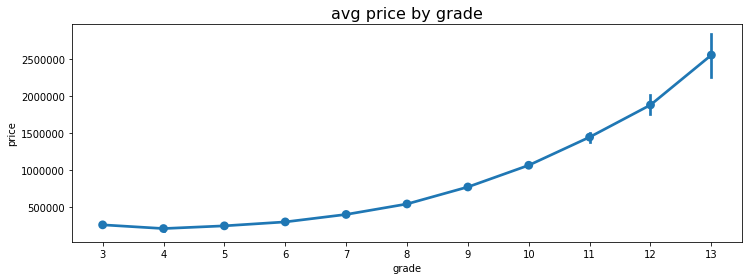

In [260]:
plt.figure(figsize=(12,4))
sns.pointplot(conditions.condition, conditions.price)
plt.title('avg price by condition', fontdict={'fontsize': 16})
plt.show()
    
plt.figure(figsize=(12,4))
sns.pointplot(grades.grade, grades.price)
plt.title('avg price by grade', fontdict={'fontsize': 16})
plt.show();

### Analysis on grade vs. condition
Grade has a more consistant impact on price than condition does. There is a sizable jump in the average price from houses in conditions 1-2 to those in 3-4, and a minor increase from houses in conditions 3-4 to those in 5. With grade, there is a clear increase as you climb up the grade scale, which gets more significant the higher the grade gets. It is interesting and leads me to assume that at a certain point, the condition of the does not make a major impact on the price anymore, meaning people are more willing to accept a price that is average or good, and that very good houses are not always worth spending way more money on.

## Do renovated houses sell for more than houses that were not?

In [261]:
import copy
kc_reno = copy.deepcopy(kc)

In [262]:
kc_renod = kc_reno[kc_reno.yr_renovated>0][['grade','price']]

In [263]:
round(kc_renod.describe(),2)

,price
count,739.00
mean,740897.17
std,494182.34
min,110000.00
25%,410750.00
50%,601500.00
75%,898750.00
max,3400000.00


In [264]:
kc_not_renod = kc_reno[kc_reno.yr_renovated==0][['grade','price']]

In [265]:
round(kc_not_renod.describe(),2)

,price
count,20330.00
mean,525347.34
std,330451.97
min,78000.00
25%,319000.00
50%,445000.00
75%,630000.00
max,3400000.00


In [266]:
print(f'{(kc_renod.shape)[0]} houses have been renovated, while {(kc_not_renod.shape)[0]} are still in their original condition.')

739 houses have been renovated, while 20330 are still in their original condition.


In [267]:
kc_gr_avg = round(kc_renod.groupby(kc_renod.grade).mean(),3)
kc_gr_avg.reset_index(inplace=True)
kc_gr_avg.grade = pd.to_numeric(kc_gr_avg.grade)
kc_gr_avg.sort_values('grade',ascending=True,inplace=True)
kc_gr_avg.rename(columns={'price':'avg_renovated_price'},inplace=True)

In [268]:
kc_n_gr_avg = round(kc_not_renod.groupby(kc_not_renod.grade).mean(),3)
kc_n_gr_avg.reset_index(inplace=True)
kc_n_gr_avg.grade = pd.to_numeric(kc_n_gr_avg.grade)
kc_n_gr_avg.sort_values('grade',ascending=True,inplace=True)
kc_n_gr_avg.rename(columns={'price':'avg_not_renovated_price'},inplace=True)

In [269]:
compare_gr_avgs = kc_n_gr_avg.merge(kc_gr_avg,how='left')
compare_gr_avgs

,grade,avg_not_renovated_price,avg_renovated_price
0,3,262000.000,NaN
1,4,207463.462,330000.000
2,5,249158.954,210742.500
3,6,301451.857,308225.274
4,7,400057.895,488020.880
5,8,535819.819,771022.391
6,9,757598.088,1129638.775
7,10,1048953.364,1587717.949
8,11,1426798.815,2150000.000
9,12,1891933.333,1610000.000


/Users/tiarahlaing/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


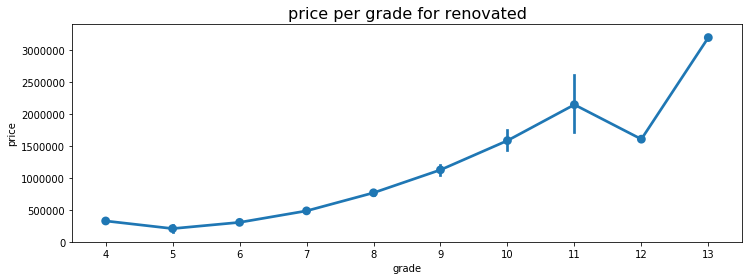

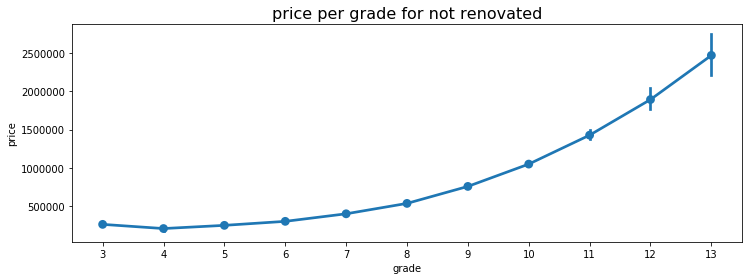

In [270]:
plt.figure(figsize=(12,4))
kc_renod.grade = pd.to_numeric(kc_renod.grade)
sns.pointplot(kc_renod.grade, kc_renod.price)
plt.title('price per grade for renovated', fontdict={'fontsize': 16})
plt.show()
    
plt.figure(figsize=(12,4))
kc_not_renod.grade = pd.to_numeric(kc_not_renod.grade)
sns.pointplot(kc_not_renod.grade, kc_not_renod.price)
plt.title('price per grade for not renovated', fontdict={'fontsize': 16})
plt.show()

### Analysis on renovated houses value
In comparing houses that were renovated and houses that were not renovated, we can see that house renovations seem to make a significant impact on the house value. The difference seems higher for the comparison on the higher grade houses than the lower ones, with the exception of grade 12. The average renovated house sold for $215,000 more than the average house that was not renovated. Also, as we saw from the previous question that grade also plays a significant factor in the price, we compared the price per grade for houses that were renovated and houses that were not. Percentage-wise, houses that were renovated were of a slightly higher grade than houses that were not. And breaking that down further, the average price per house was also higher for each grade level for renovated houses over houses that were not renovated.

Because of the consistency with which the price rises as the grade rises, I wonder if it would have multicollinearity with any other features that we previously noticed a linear trend with.

In [272]:
kc.grade = kc.grade.astype('int')

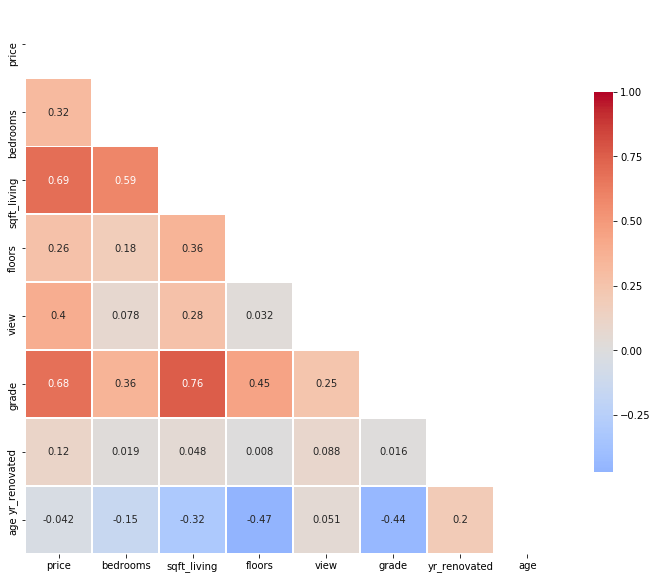

In [273]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 10))

corr = kc.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(round(kc.corr(),3), mask=mask, cbar_kws={'shrink':.7}, annot=True, center=0, linewidth=0.3, cmap='coolwarm');

There is a significant relationship between sqft_living and grade (0.76), and both have a high relationship with price. But sqft_living still has a higher correlation with price, so I will drop grade.

In [274]:
kc.drop(columns=['grade'],axis=1,inplace=True)

In [275]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats)} numeric features are {num_feats}.\n\n All the kept columns are {list(kc.columns)}')

 The 6 numeric features are ['bedrooms', 'sqft_living', 'floors', 'view', 'yr_renovated', 'age'].

 All the kept columns are ['date', 'price', 'bedrooms', 'sqft_living', 'floors', 'view', 'condition', 'yr_renovated', 'zipcode', 'age']


## Scaling the Data

Before we can begin modeling the data, we must scale it so that the features are accurately comparable. Because yr_renovated and view have so many 0 values, I will remove them for now, but will keep them to the side in case it might be useful.

In [276]:
yr_renovated = kc.yr_renovated
yr_renovated.head()

0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
Name: yr_renovated, dtype: float64

In [277]:
view = kc.view
view.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: float64

In [278]:
kc.drop(columns=['yr_renovated','view'],axis=1,inplace=True)

In [285]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats)} numeric features are {num_feats}.\n\n All the kept columns are {list(kc.columns)}')

 The 4 numeric features are ['bedrooms', 'sqft_living', 'floors', 'age'].

 All the kept columns are ['date', 'price', 'bedrooms', 'sqft_living', 'floors', 'condition', 'zipcode', 'age']


In [280]:
kc.describe()

,price,bedrooms,sqft_living,floors,age
count,2.106900e+04,21069.000000,21069.000000,21069.000000,21069.000000
mean,5.329078e+05,3.362476,2062.799801,1.480327,44.240116
std,3.398463e+05,0.902520,894.589275,0.534330,28.995631
min,7.800000e+04,1.000000,370.000000,1.000000,1.000000
25%,3.200000e+05,3.000000,1420.000000,1.000000,19.000000
50%,4.500000e+05,3.000000,1900.000000,1.000000,41.000000
75%,6.390000e+05,4.000000,2520.000000,2.000000,63.000000
max,3.400000e+06,11.000000,8670.000000,3.500000,115.000000


Now I will scale the data for the continuous variables. I will do so in a separate data frame.

In [282]:
kc_scaled = copy.deepcopy(kc)
kc_scaled.head()

,date,price,bedrooms,sqft_living,floors,condition,zipcode,age
0,2014-10-13,221900.0,3,1180,1.0,3,98178,59
1,2014-12-09,538000.0,3,2570,2.0,3,98125,63
2,2015-02-25,180000.0,2,770,1.0,3,98028,82
3,2014-12-09,604000.0,4,1960,1.0,5,98136,49
4,2015-02-18,510000.0,3,1680,1.0,3,98074,28


In [284]:
num_feats_s = list(((kc_scaled.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats_s)} numeric features are {num_feats_s}.\n\n All the kept columns are {list(kc_scaled.columns)}')

 The 4 numeric features are ['bedrooms', 'sqft_living', 'floors', 'age'].

 All the kept columns are ['date', 'price', 'bedrooms', 'sqft_living', 'floors', 'condition', 'zipcode', 'age']


In [286]:
for feat in num_feats_s:
    kc_scaled[feat] = (kc_scaled[feat] - kc_scaled[feat].mean())/kc_scaled[feat].std()

In [291]:
kc_scaled.head()

,date,price,bedrooms,sqft_living,floors,condition,zipcode,age
0,2014-10-13,221900.0,-0.401626,-0.986821,-0.898932,3,98178,0.509038
1,2014-12-09,538000.0,-0.401626,0.566964,0.972570,3,98125,0.646990
2,2015-02-25,180000.0,-1.509635,-1.445132,-0.898932,3,98028,1.302261
3,2014-12-09,604000.0,0.706383,-0.114913,-0.898932,5,98136,0.164159
4,2015-02-18,510000.0,-0.401626,-0.427906,-0.898932,3,98074,-0.560088


## Modeling the Data

As we begin modeling the data, I will drop the date column, as this isn't a feature that will help with future predictions.

In [289]:
kc.drop(['date'],axis=1,inplace=True)

In [290]:
num_feats = list(((kc.select_dtypes(include=[np.number])).drop('price',axis=1)).columns)
print(f' The {len(num_feats)} numeric features are {num_feats}.\n\n All the kept columns are {list(kc.columns)}')

 The 4 numeric features are ['bedrooms', 'sqft_living', 'floors', 'age'].

 All the kept columns are ['price', 'bedrooms', 'sqft_living', 'floors', 'condition', 'zipcode', 'age']


In [293]:
kc.dtypes

price          float64
bedrooms         int64
sqft_living      int64
floors         float64
condition       object
zipcode         object
age              int64
dtype: object

Condition and zipcode are our remaining categorical variables, so we will one-hot encode them.

### One-Hot Encoding Categorical Columns

In [294]:
kc_wdums = copy.deepcopy(kc)
kc_wdums = pd.get_dummies(kc_wdums, drop_first=True)
kc_wdums.head()

,price,bedrooms,sqft_living,floors,age,condition_2,condition_3,condition_4,condition_5,zipcode_98002,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1180,1.0,59,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2570,2.0,63,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,770,1.0,82,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,1960,1.0,49,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,1680,1.0,28,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
for cat in kc_wdums.iloc[:,5:].columns:
    kc_wdums[cat] = kc_wdums[cat].astype('category')
kc_wdums.dtypes.head(10)

price             float64
bedrooms            int64
sqft_living         int64
floors            float64
age                 int64
condition_2      category
condition_3      category
condition_4      category
condition_5      category
zipcode_98002    category
dtype: object

Now we can begin modeling.

In [297]:
cols = kc_wdums.describe().columns.drop(['price'])
results = [['Target_variable', 'R_squared', 'intercept', 'slope', 'p_value']]
for idx, val in enumerate(cols):
    print('Housing: price~' + val)
    print('-----------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_wdums).fit()
    X_new = pd.DataFrame({val: [kc_wdums[val].min(), kc_wdums[val].max()]})
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[idx+1])

Housing: price~bedrooms
-----------------------------
['bedrooms', 0.0999797210334531, 132556.87204786134, 119064.33476121498, 0.0]
Housing: price~sqft_living
-----------------------------
['sqft_living', 0.4803621614256991, -10217.818905672138, 263.29536205844124, 0.0]
Housing: price~floors
-----------------------------
['floors', 0.06978145719991558, 284193.6810794844, 168013.01107237604, 0.0]
Housing: price~age
-----------------------------
['age', 0.0017339936781530785, 554499.6557483127, -488.06052812341784, 1.4797133492445857e-09]


In [298]:
pd.DataFrame(results)

,0,1,2,3,4
0,Target_variable,R_squared,intercept,slope,p_value
1,bedrooms,0.0999797,132557,119064,0
2,sqft_living,0.480362,-10217.8,263.295,0
3,floors,0.0697815,284194,168013,0
4,age,0.00173399,554500,-488.061,1.47971e-09


All of the variables have p-values below 0.05, which means that there is some level of significance for each one. sqft_living has the highest R-squared value, indicating that it currently seems most related to the housing price. The R-squared values are still low over all, though, so we will attempt to normalize the data set.

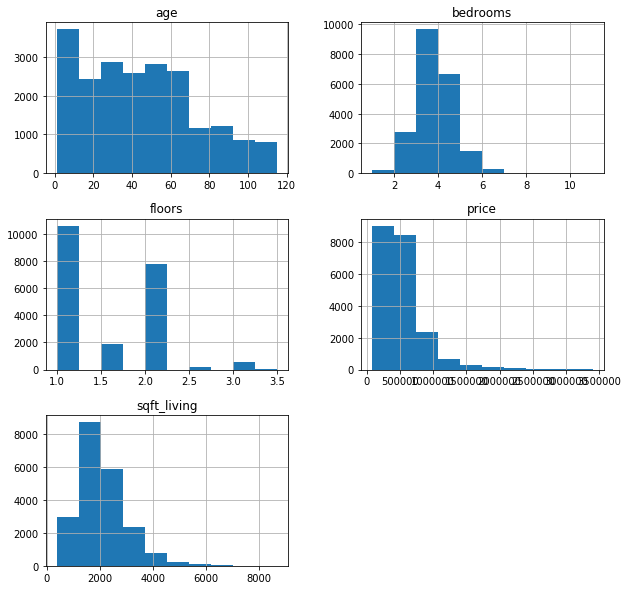

In [299]:
kc_wdums.hist(figsize=[10,10]); #current distributions before log transformation

In [300]:
kc_log = copy.deepcopy(kc_wdums)

In [307]:
for col in ['price','bedrooms','sqft_living','floors','age']:
    kc_log[col] = np.log(kc_log[col])

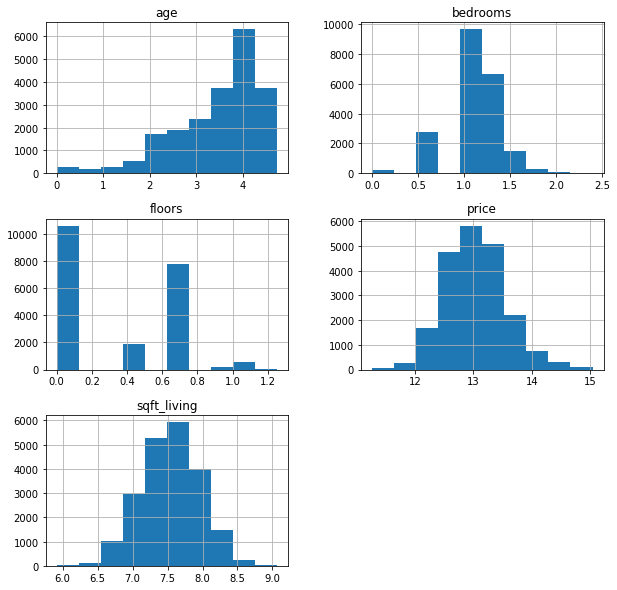

In [308]:
kc_log.hist(figsize=[10,10]); #distributions after log transformation

This logged distribution for price, bedrooms, and sqft_living look very normal compared to before.

In [310]:
coll = kc_log.describe().columns.drop(['price'])
resultsl = [['Target_variable', 'R_squared', 'intercept', 'slope', 'p_value']]
for idx, val in enumerate(coll):
    print('Housing: price~' + val)
    print('-----------------------------')
    
    f = 'price~' + val
    model = smf.ols(formula=f, data=kc_log).fit()
    X_new = pd.DataFrame({val: [kc_log[val].min(), kc_log[val].max()]})
    preds = model.predict(X_new)
    resultsl.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(resultsl[idx+1])

Housing: price~bedrooms
-----------------------------
['bedrooms', 0.11380659990542086, 12.309640536768429, 0.6216373216764373, 0.0]
Housing: price~sqft_living
-----------------------------
['sqft_living', 0.4477303207715597, 6.798250332862657, 0.8274058796242819, 0.0]
Housing: price~floors
-----------------------------
['floors', 0.1009883753980011, 12.884008855189128, 0.4730684868258286, 0.0]
Housing: price~age
-----------------------------
['age', 0.014482990593062461, 13.268975931749946, -0.06604677831719896, 8.305515358070235e-69]


In [311]:
pd.DataFrame(resultsl)

,0,1,2,3,4
0,Target_variable,R_squared,intercept,slope,p_value
1,bedrooms,0.113807,12.3096,0.621637,0
2,sqft_living,0.44773,6.79825,0.827406,0
3,floors,0.100988,12.884,0.473068,0
4,age,0.014483,13.269,-0.0660468,8.30552e-69


In [312]:
pd.DataFrame(results) #original results, for comparison

,0,1,2,3,4
0,Target_variable,R_squared,intercept,slope,p_value
1,bedrooms,0.0999797,132557,119064,0
2,sqft_living,0.480362,-10217.8,263.295,0
3,floors,0.0697815,284194,168013,0
4,age,0.00173399,554500,-488.061,1.47971e-09


### Observations:
All p-values are still good. The R-squared for bedrooms, floors, and age went up, but the R-squared for sqft_living went down.

## Building models, using the categorical variables as predictors.

In [313]:
kc_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21069 entries, 0 to 21596
Data columns (total 78 columns):
price            21069 non-null float64
bedrooms         21069 non-null float64
sqft_living      21069 non-null float64
floors           21069 non-null float64
age              21069 non-null float64
condition_2      21069 non-null category
condition_3      21069 non-null category
condition_4      21069 non-null category
condition_5      21069 non-null category
zipcode_98002    21069 non-null category
zipcode_98003    21069 non-null category
zipcode_98004    21069 non-null category
zipcode_98005    21069 non-null category
zipcode_98006    21069 non-null category
zipcode_98007    21069 non-null category
zipcode_98008    21069 non-null category
zipcode_98010    21069 non-null category
zipcode_98011    21069 non-null category
zipcode_98014    21069 non-null category
zipcode_98019    21069 non-null category
zipcode_98022    21069 non-null category
zipcode_98023    21069 non-null cat

In [314]:
# for original, not logged data

cols_cond = [column for column in kc_wdums.columns if 'condition' in column]
cols_zip = [column for column in kc_wdums.columns if 'zipcode' in column]

cols = [cols_cond, cols_zip]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'price~' + sum_cols
    model = smf.ols(formula=f, data=kc_wdums).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     43.28
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           3.14e-36
Time:                        12:31:22   Log-Likelihood:            -2.9815e+05
No. Observations:               21069   AIC:                         5.963e+05
Df Residuals:                   21064   BIC:                         5.963e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.411e+05   6.29e+04  

In [316]:
# for logged data

cols_condl = [column for column in kc_log.columns if 'condition' in column]
cols_zipl = [column for column in kc_log.columns if 'zipcode' in column]

colsl = [cols_condl, cols_zipl]
for col in colsl:
    sum_cols = '+'.join(col)
    f = 'price~' + sum_cols
    model = smf.ols(formula=f, data=kc_log).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     73.94
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           2.45e-62
Time:                        12:34:21   Log-Likelihood:                -16017.
No. Observations:               21069   AIC:                         3.204e+04
Df Residuals:                   21064   BIC:                         3.208e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.5128      0.096  

## Building the final model
The logged dataset looks better, so I will use that one. I will drop the age and floors columns, as they had the lowest fit to price. Category doesn't seem to actually a big impact, so I will drop this column entirely. I will also need to drop a column from zipcodes for the model.

In [317]:
kc_log.columns

Index(['price', 'bedrooms', 'sqft_living', 'floors', 'age', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcod

In [319]:
kc_log.drop(kc_log.columns[5:10],axis=1,inplace=True)

In [350]:
kc_log.drop(kc_log.columns[3:5],axis=1,inplace=True)

In [374]:
kc_log.columns

Index(['price', 'bedrooms', 'sqft_living', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119',

In [352]:
kc_final = kc_log

## Using feature ranking with recursive feature elimination

In [376]:
y = kc_final[['price']].values # This fixes the string price being printed below
X = kc_final.drop(['price'], axis=1)
X.head()

,bedrooms,sqft_living,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.098612,7.073270,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1.098612,7.851661,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.693147,6.646391,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.386294,7.580700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.098612,7.426549,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [377]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [378]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.5062985545979397
0.5046763154564213
0.6157754800290578
0.6145129679152431
0.6933806701747566
0.692373158685736
0.7590038444037042
0.7582119621837821
0.7923799085979809
0.7916976958113369
0.814410130091228
0.8138003057651313
0.8174670218283137
0.8168672420533793
0.817623153713651
0.8170238869679127
0.817623153713651
0.8170238869679127


The adjusted r-squared values increase as we add features.

## Train Test Split
Running a 20-80 train-test split

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

MSE_train = []
MSE_test = []
list_n = list(range(5, 86, 10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_]
    linreg.fit(X_train[selected_columns], y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_train.append(mse_train)
MSE_test.append(mse_test)

0.13554941141669066
0.12826366705221812
0.1055154192833221
0.09976006287401368
0.08404968522321991
0.0802795496474447
0.0661331347706003
0.06403968447010973
0.05669136287285907
0.055321441925150955
0.05081087226121083
0.04897518456088316
0.04993471235063071
0.04837244237842313
0.049884097118858585
0.04836978327934562
0.049884097118858585
0.04836978327934562


The MSE continues to decrease as we add variables, which is good.

In [382]:
import statsmodels.api as sm

X_fin = X[selected_columns].astype(float)
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:20:20   Log-Likelihood:                 1753.3
No. Observations:               21069   AIC:                            -3375.
Df Residuals:                   21003   BIC:                            -2849.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7045      0.034    196.537      0.000       6.638       6.771
bedrooms         -0.1579      0.007    -21.694      0.000      -0.172      -0.144
sqft_living       0.7987      0.005    154.817      0.000       0.789       0.809
zipcode_98004     1.2100      0.014     87.793      0.000       1.183       1.237
zipcode_98005     0.8117      0.018     45.092      0.000       0.776       0.847
zipcode_98006     0.7614      0.011     66.696      0.000       0.739       0.784
zipcode_98007     0.6911      0.019     35.500      0.000       0.653       0.729
zipcode_98008     0.7042      0.014     49.495      0.000       0.676       0.732
zipcode_98010     0.2938      0.023     12.719      0.000       0.249       0.339
zipcode_98011     0.4353      0.017     25.523      0.000       0.402       0.469
zipcode_98014     0.3432      0.021     16.588      0.000       0.303       0.384
zipcode_98019     0.3075      0.017     18.117      0.000       0.274       0.341
zipcode_98022     0.1279      0.016      8.189      0.000       0.097       0.158
zipcode_98024     0.5159      0.026     19.898      0.000       0.465       0.567
zipcode_98027     0.5512      0.012     45.068      0.000       0.527       0.575
zipcode_98028     0.4127      0.014     28.879      0.000       0.385       0.441
zipcode_98029     0.6364      0.014     45.993      0.000       0.609       0.664
zipcode_98031     0.0655      0.014      4.536      0.000       0.037       0.094
zipcode_98033     0.8360      0.012     69.447      0.000       0.812       0.860
zipcode_98034     0.5538      0.011     50.996      0.000       0.533       0.575
zipcode_98038     0.1597      0.011     14.926      0.000       0.139       0.181
zipcode_98039     1.4293      0.034     41.465      0.000       1.362       1.497
zipcode_98040     1.0402      0.015     71.311      0.000       1.012       1.069
zipcode_98042     0.0766      0.011      7.077      0.000       0.055       0.098
zipcode_98045     0.3655      0.016     22.884      0.000       0.334       0.397
zipcode_98052     0.6648      0.011     61.514      0.000       0.644       0.686
zipcode_98053     0.6124      0.013     48.936      0.000       0.588       0.637
zipcode_98055     0.1243      0.015      8.526      0.000       0.096       0.153
zipcode_98056     0.3238      0.012     26.301      0.000       0.300       0.348
zipcode_98058     0.1739      0.012     14.946      0.000       0.151       0.197
zipcode_98059     0.3584      0.012     30.574      0.000       0.335       0.381
zipcode_98065     0.3961      0.014     28.298      0.000       0.369       0.424
zipcode_98070     0.5166      0.021     24.276      0.000       0.475       0.558
zipcode_98072     0.5255      0.015     36.105      0.000       0.497       0.554
zipcode_98074     0.6248      0.012     51.766   

## Interpreting the Data

Our final model produced a 0.817 R-squared value, indicating that 81% of the variance in price can be explained by this model. The features that we included for this model were house square footage, number of bedrooms, and zipcode. These features seemed to have the biggest influence in determining the sell price of a house. 

Square footage had a high correlation with the price, indicating that size has a big impact. This understanding coincides with the significance of the number of bedrooms, as that is also a feature that is related to size, in terms of how many people the house can accommodate. Also, as we can see from the result of adding in zipcode as a feature to consider, there was a significant increase in the correlation coefficient. This indicates that location is a very important factor, and certain neighborhoods have houses that are much more highly priced than other neighborhoods.